TODO Adicionar analises e respostas

In [1]:
import sys
sys.path.append('src')
from src.utils.graph import Grafo
import matplotlib.pyplot as plt

### 1. Distribuicão de graus
- Qual é a distribuição de graus de ambos os grafos? Essa distribuição apresenta
características típicas de rede complexas?

In [2]:
grafo_direcionado = Grafo.load_pickled_graph("src/grafo_direcionado.pkl")
grafo_nao_direcionado = Grafo.load_pickled_graph("src/grafo_nao_direcionado.pkl")

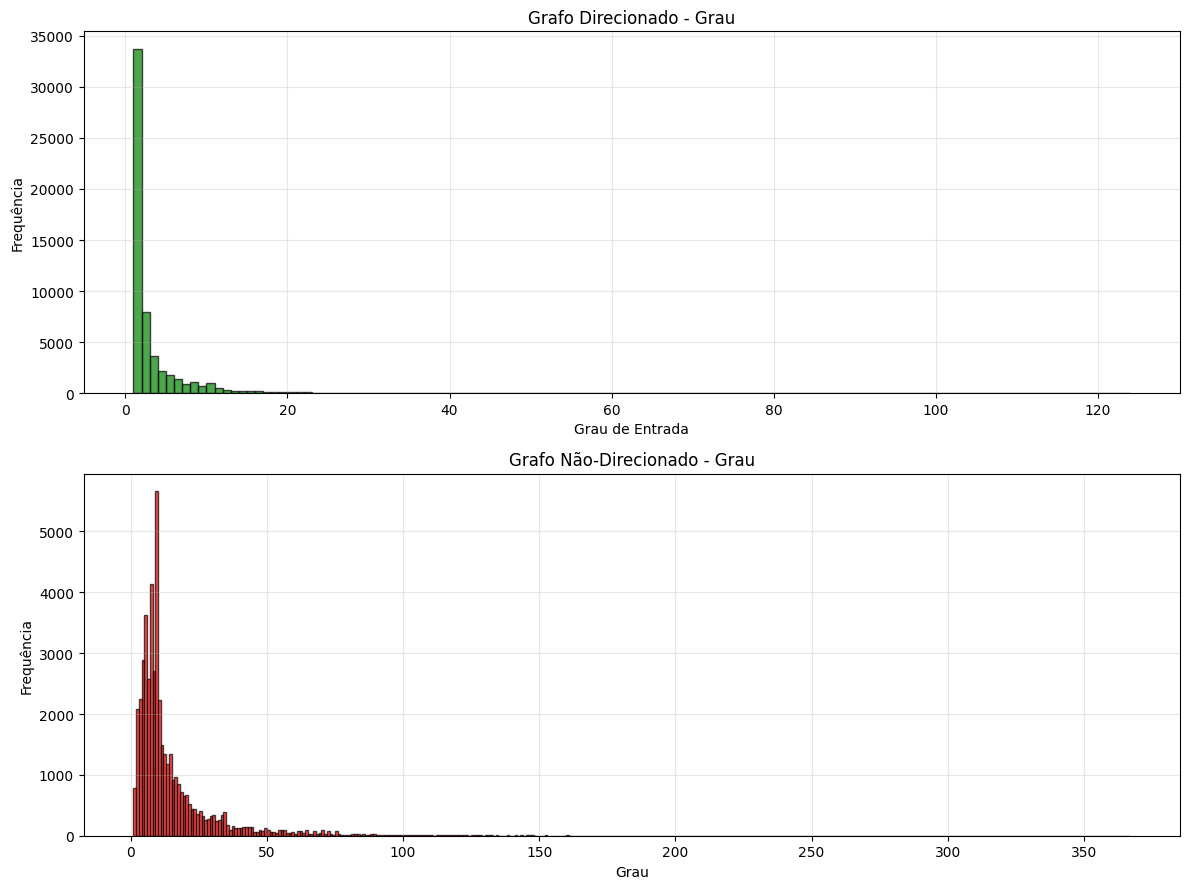

In [17]:
graus_direcionado = grafo_direcionado.todos_os_graus()
graus_total_direcionado = {}
for grau in graus_direcionado:
    graus_total_direcionado[grau] = graus_direcionado[grau]['total']

graus_nao_direcionado = grafo_nao_direcionado.todos_os_graus()

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 9))

plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.default'] = 'regular'

# Graus total (direcionado)
ax1.hist(list(graus_total_direcionado.values()), bins='auto', alpha=0.7, color='green', edgecolor='black')
ax1.set_title('Grafo Direcionado - Grau')
ax1.set_xlabel('Grau de Entrada')
ax1.set_ylabel('Frequência')
ax1.grid(True, alpha=0.3)

# Grau total (não-direcionado)
ax2.hist(list(graus_nao_direcionado.values()), bins='auto', alpha=0.7, color='red', edgecolor='black')
ax2.set_title('Grafo Não-Direcionado - Grau')
ax2.set_xlabel('Grau')
ax2.set_ylabel('Frequência')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2. Componentes Conexas e Fortemente Conexas
-  Quantas componentes conexas (grafo não-direcionado) e fortemente conexas (grafo
direcionado) existem? Qual a distribuição de ordem dessas componentes (número de vértices)?
O que essa distribuição indica sobre as características do problema?

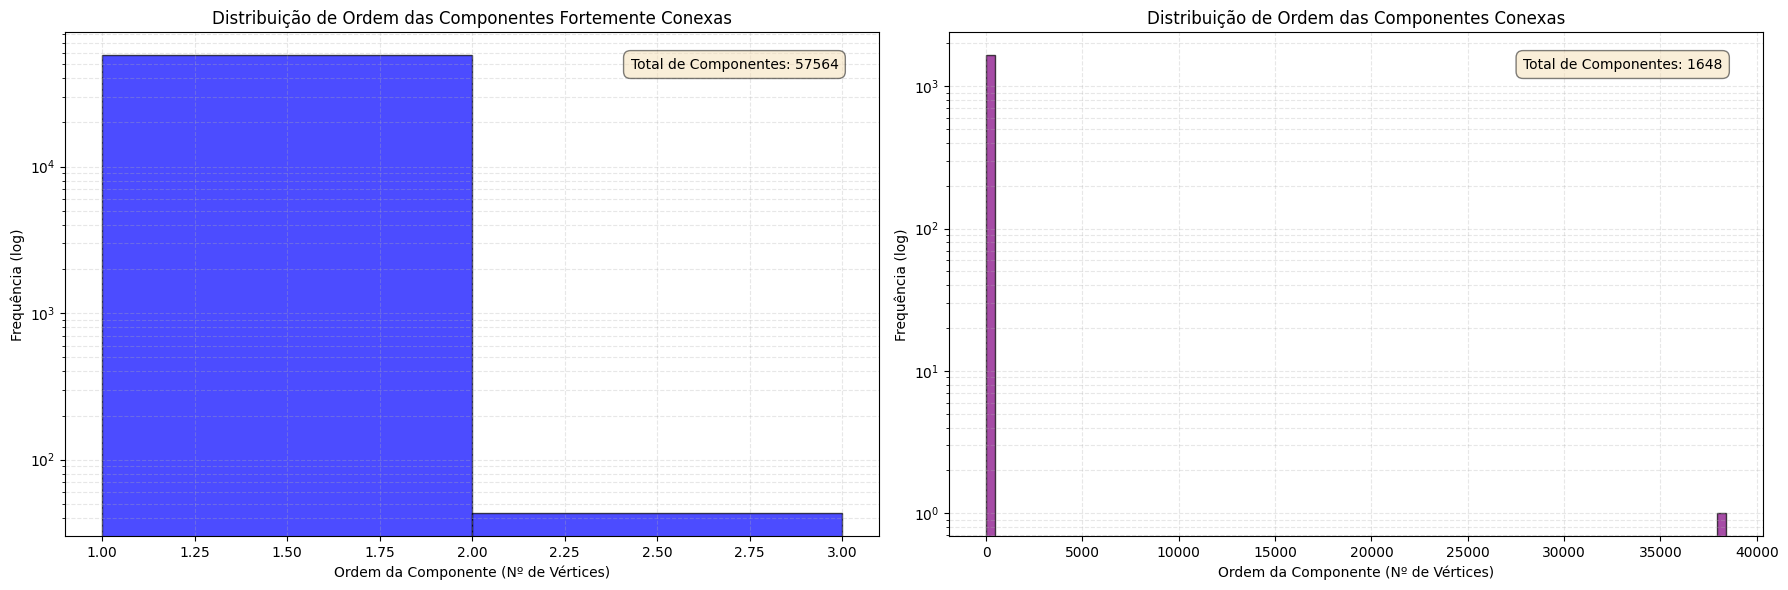

Número de componentes fortemente conexas: 57564
Número de componentes conexas: 1648


In [ ]:
# Funções para encontrar componentes fortemente conexas (Algoritmo de Kosaraju)
def dfs_order(grafo, source_node, visited, stack):
    visited.add(source_node)
    # Adicionado checagem se o nó existe na lista de adjacência
    if source_node in grafo.adj_list:
        for adj, _ in grafo.adj_list[source_node]:
            if adj not in visited:
                dfs_order(grafo, adj, visited, stack)
    stack.append(source_node)

def dfs_componente(grafo, source_node, visited, componente):
    visited.add(source_node)
    componente.append(source_node)
    # Adicionado checagem se o nó existe na lista de adjacência
    if source_node in grafo.adj_list:
        for adj, _ in grafo.adj_list[source_node]:
            if adj not in visited:
                dfs_componente(grafo, adj, visited, componente)

def kosaraju(grafo):
    if not grafo.direcionado:
        raise ValueError("Kosaraju funciona apenas com grafos direcionados.")
    
    visited = set()
    stack = []
    for vertice in grafo.adj_list.keys():
        if vertice not in visited:
            dfs_order(grafo, vertice, visited, stack)
            
    grafo_invertido = grafo.inverter_grafo()
    
    visited = set()
    componentes_fortemente_conexas = []
    while stack:
        vertice = stack.pop()
        if vertice not in visited:
            componente = []
            dfs_componente(grafo_invertido, vertice, visited, componente)
            componentes_fortemente_conexas.append(componente)
            
    return componentes_fortemente_conexas

# Função para encontrar componentes conexas (usando BFS)
def bfs_componentes_conexas(grafo):
    if grafo.direcionado:
        raise ValueError("Esta função só deve ser usada com grafos não-direcionados.")
    
    visitados = set()
    componentes = []
    for vertice in grafo.adj_list:
        if vertice not in visitados:
            componente_atual = []
            fila = [vertice]
            visitados.add(vertice)
            while fila:
                v = fila.pop(0)
                componente_atual.append(v)
                for vizinho, _ in grafo.adj_list[v]:
                    if vizinho not in visitados:
                        visitados.add(vizinho)
                        fila.append(vizinho)
            componentes.append(componente_atual)
    return componentes

componentes_fortemente_conexas = kosaraju(grafo_direcionado)
ordem_componentes_fortemente_conexas = [len(c) for c in componentes_fortemente_conexas]

componentes_conexas = bfs_componentes_conexas(grafo_nao_direcionado)
ordem_componentes_conexas = [len(c) for c in componentes_conexas]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Histograma para componentes fortemente conexas
ax1.hist(ordem_componentes_fortemente_conexas, bins='auto', alpha=0.7, color='blue', edgecolor='black')
ax1.set_title('Distribuição de Ordem das Componentes Fortemente Conexas')
ax1.set_xlabel('Ordem da Componente (Nº de Vértices)')
ax1.set_ylabel('Frequência (log)')
ax1.set_yscale('log')
ax1.grid(True, which="both", ls="--", alpha=0.3)
ax1.text(0.95, 0.95, f'Total de Componentes: {len(componentes_fortemente_conexas)}', 
         transform=ax1.transAxes, ha='right', va='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))


# Histograma para componentes conexas
ax2.hist(ordem_componentes_conexas, bins='auto', alpha=0.7, color='purple', edgecolor='black')
ax2.set_title('Distribuição de Ordem das Componentes Conexas')
ax2.set_xlabel('Ordem da Componente (Nº de Vértices)')
ax2.set_ylabel('Frequência (log)')
ax2.set_yscale('log')
ax2.grid(True, which="both", ls="--", alpha=0.3)
ax2.text(0.95, 0.95, f'Total de Componentes: {len(componentes_conexas)}', 
         transform=ax2.transAxes, ha='right', va='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))


plt.tight_layout()
plt.show()

print(f"Número de componentes fortemente conexas: {len(componentes_fortemente_conexas)}")
print(f"Número de componentes conexas: {len(componentes_conexas)}")

### Análise da Conectividade dos Grafos

**Grafo Direcionado (Atores -> Diretores):**
O gráfico de distribuição para o grafo direcionado mostra um número muito grande de componentes fortemente conexas, a maioria absoluta sendo de tamanho 1. Isso indica que a rede de colaboração ator-diretor é majoritariamente acíclica. Em outras palavras, é raro encontrar um grupo de atores e diretores onde existe um ciclo de colaboração (e.g., Ator A trabalha com Diretor B, que trabalha com Ator C, que por sua vez trabalha com um diretor que trabalhou com o Ator A). As poucas componentes com mais de um vértice representam esses raros "núcleos" de colaboração mútua. A grande quantidade de componentes isoladas sugere uma estrutura de rede onde a influência e colaboração tendem a fluir em uma direção, sem reciprocidade.

**Grafo Não-Direcionado (Atores - Atores):**
Para o grafo não-direcionado, a situação é drasticamente diferente. O histograma revela a existência de uma **componente gigante**, que engloba a grande maioria dos atores da base de dados, e um número relativamente pequeno de componentes menores e isoladas. Este é um fenômeno característico de redes de mundo real, como redes sociais e de colaboração, e aponta para o conceito de "mundo pequeno". A componente gigante significa que quase qualquer ator pode ser conectado a outro por uma cadeia de co-protagonismo. As pequenas componentes isoladas representam grupos de atores que colaboraram apenas entre si, formando "ilhas" no universo cinematográfico que não se conectam à rede principal de colaborações.

### 3. Métricas top 10

- Para o grafo direcionado, quais são os 10 diretores mais influentes perante a métrica
de centralidade de grau? O que essa métrica representa nesse contexto?

- JAMES FRANCO: 0.0009
- ANUPAM KHER: 0.0007
- AMITABH BACHCHAN: 0.0007
- PRAKASH RAJ: 0.0006
- KRISTEN BELL: 0.0006
- JIM CUMMINGS: 0.0006
- AKSHAY KUMAR: 0.0006
- NASEERUDDIN SHAH: 0.0006
- ALFRED MOLINA: 0.0006
- NICOLAS CAGE: 0.0006

- Para o grafo direcionado, quais são os 10 diretores mais influentes perante a métrica
de centralidade de proximidade? O que essa métrica representa nesse contexto?

- JOSH GAD: 0.0005
- SAMUEL L. JACKSON: 0.0004
- JIM STURGESS: 0.0004
- KATE BOSWORTH: 0.0004
- VIPIN SHARMA: 0.0004
- CHRISTOPHER PLUMMER: 0.0004
- THOMAS JANE: 0.0003
- TOM KANE: 0.0003
- FRED TATASCIORE: 0.0003
- DEMIÁN BICHIR: 0.0003

- Para o grafo não-direcionado, quais são os 10 atores/atrizes mais influentes perante
a métrica de centralidade de grau? O que essa métrica representa nesse contexto?

- ANUPAM KHER: 0.0076
- DANNY TREJO: 0.0056
- AMITABH BACHCHAN: 0.0053
- PARESH RAWAL: 0.0052
- MORGAN FREEMAN: 0.0051
- JOHN GOODMAN: 0.0051
- SAMUEL L. JACKSON: 0.0050
- PAUL GIAMATTI: 0.0048
- FRED ARMISEN: 0.0047
- SHAH RUKH KHAN: 0.0047

- Para o grafo não-direcionado, quais são os 10 atores/atrizes mais influentes perante
a métrica de centralidade de intermediação? O que essa métrica representa nesse contexto?

- SAMUEL L. JACKSON: 0.2151
- JOHN C. REILLY: 0.2113
- CHRISTOPHER PLUMMER: 0.2107
- LAURENCE FISHBURNE: 0.2090
- KATE BOSWORTH: 0.2080
- KEVIN SPACEY: 0.2069
- JOHN CUSACK: 0.2058
- FRED TATASCIORE: 0.2053
- JIM STURGESS: 0.2052
- CRISPIN GLOVER: 0.2048

- Para o grafo não-direcionado, quais são os 10 atores/atrizes mais influentes perante
a métrica de centralidade de proximidade? O que essa métrica representa nesse contexto?

- ANUPAM KHER : 0.05240147765651486
- BEN KINGSLEY : 0.01829429488801802
- OM PURI : 0.017969821392549653
- IKO UWAIS : 0.012885667581777668
- DANNY GLOVER : 0.009674625831328205
- STEVE BLUM : 0.00953437007900254
- PRIYANKA CHOPRA : 0.008124818694812321
- ERNEST BORGNINE : 0.008111389631297674
- ALFRED MOLINA : 0.00796524656651062
- MICHAEL MADSEN : 0.007685415062783165

- Para o grafo direcionado, quais são os 10 diretores mais influentes perante a métrica
de centralidade de intermediação? O que essa métrica representa nesse contexto?

- JAMES FRANCO: 0.0000007740891312778005
- JON FAVREAU: 0.0000006267440222101304
- FRANK OZ: 0.00000046538756841516656
- MAHESH MANJREKAR: 0.0000003977413987102751
- ELIZABETH BANKS: 0.0000003945775466750797
- JIM HENSON: 0.00000036941739001424036
- SETH ROGEN: 0.00000036113111087444294
- BRIAN HENSON: 0.00000034727042576787276
- RAJAT KAPOOR: 0.00000030915354172480474
- GAUTHAM VASUDEV MENON: 0.0000003060399095631839